### Importing dependencies

In [54]:
import numpy as np
import pandas as pd

from src.data.load_data import load_data_csv
from src.data.save_data import save_data_csv
from src.features.features import transform_label
from src.visualization.visualization import plot_corr_matrix

### Data cleaning

In [27]:
obesity_data = load_data_csv("../../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv")

In [28]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
obesity_data_v1 = obesity_data.drop_duplicates() 

In [35]:
obesity_data_v1[obesity_data_v1.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [36]:
obesity_data_v1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [37]:
obesity_data_v1.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [38]:
obesity_data_v1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [39]:
cols = ['Gender', 'family_history_with_overweight',
       'FAVC', 'SMOKE', 'SCC', 'FAF', 'TUE','NObeyesdad']

In [40]:
for col in cols:
    obesity_data_v1[col] = transform_label(obesity_data_v1[col])

C:\Users\ASF\AppData\Local\Temp\ipykernel_3396\4282777862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data_v1[col] = transform_label(obesity_data_v1[col])
C:\Users\ASF\AppData\Local\Temp\ipykernel_3396\4282777862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data_v1[col] = transform_label(obesity_data_v1[col])
C:\Users\ASF\AppData\Local\Temp\ipykernel_3396\4282777862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [41]:
obesity_data_v1.dtypes

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                          int64
dtype: object

In [42]:
obesity_data_v1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [43]:
cols = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE','NObeyesdad']

In [44]:
obesity_data_v1["NObeyesdad"] = transform_label(obesity_data_v1["NObeyesdad"])

C:\Users\ASF\AppData\Local\Temp\ipykernel_3396\3135529714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data_v1["NObeyesdad"] = transform_label(obesity_data_v1["NObeyesdad"])


In [45]:
obesity_data_v1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,0,2.0,3.0,Sometimes,0,2.00,0,0,567,no,Public_Transportation,1
1,0,21,1.52,56.00,1,0,3.0,3.0,Sometimes,1,3.00,1,256,0,Sometimes,Public_Transportation,1
2,1,23,1.80,77.00,1,0,2.0,3.0,Sometimes,0,2.00,0,197,567,Frequently,Public_Transportation,1
3,1,27,1.80,87.00,0,0,3.0,3.0,Sometimes,0,2.00,0,197,0,Frequently,Walking,5
4,1,22,1.78,89.80,0,0,2.0,1.0,Sometimes,0,2.00,0,0,0,Sometimes,Public_Transportation,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,Sometimes,0,1.73,0,167,512,Sometimes,Public_Transportation,4
2107,0,22,1.75,133.74,1,1,3.0,3.0,Sometimes,0,2.01,0,133,323,Sometimes,Public_Transportation,4
2108,0,23,1.75,133.69,1,1,3.0,3.0,Sometimes,0,2.05,0,140,344,Sometimes,Public_Transportation,4
2109,0,24,1.74,133.35,1,1,3.0,3.0,Sometimes,0,2.85,0,113,317,Sometimes,Public_Transportation,4


In [56]:
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [46]:
obesity_data_v1 = obesity_data_v1[cols]

### Features selection

In [47]:
obesity_data_v1.dtypes

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                                 int64
TUE                                 int64
NObeyesdad                          int64
dtype: object

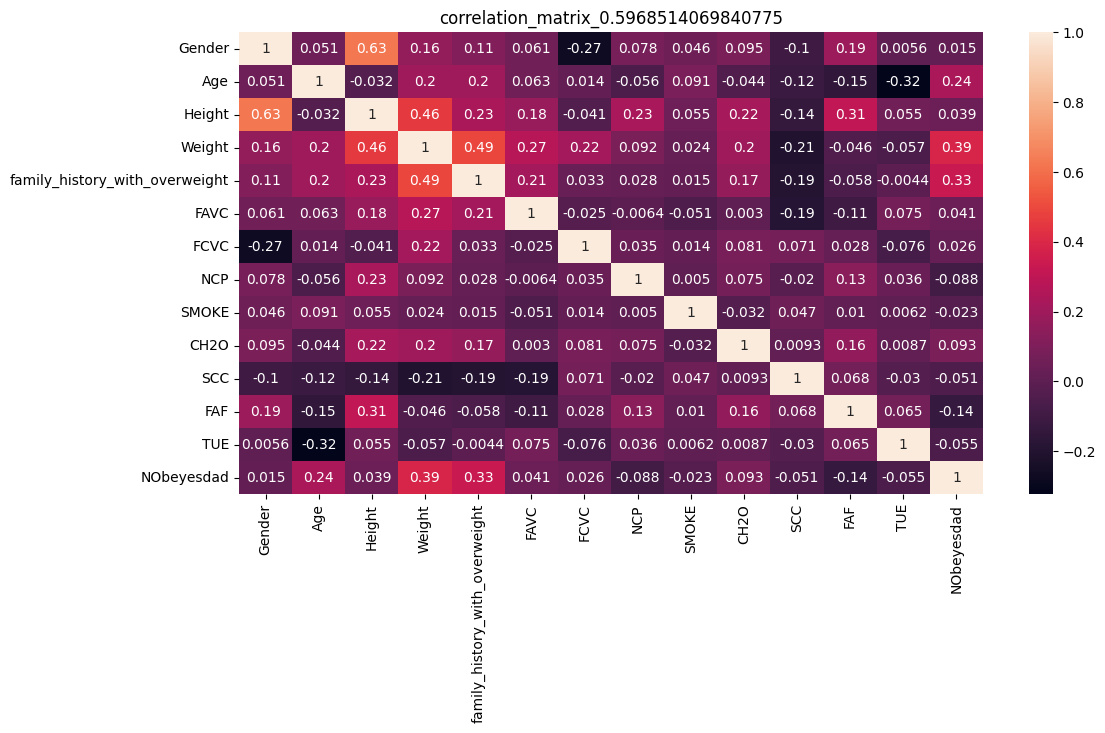

In [49]:
plot_corr_matrix(obesity_data_v1)

In [50]:
new_cols = ['Age','Height', 'Weight', 'family_history_with_overweight','NObeyesdad']

In [51]:
obesity_data_v1 = obesity_data_v1[new_cols]

In [52]:
obesity_data_v1

,Age,Height,Weight,family_history_with_overweight,NObeyesdad
0,21,1.62,64.00,1,1
1,21,1.52,56.00,1,1
2,23,1.80,77.00,1,1
3,27,1.80,87.00,0,5
4,22,1.78,89.80,0,6
...,...,...,...,...,...
2106,21,1.71,131.41,1,4
2107,22,1.75,133.74,1,4
2108,23,1.75,133.69,1,4
2109,24,1.74,133.35,1,4


In [55]:
save_data_csv(obesity_data_v1, "obesity_data_clean")